In [1]:
from climada.util.api_client import Client
from climada_petals.engine import SupplyChain as
from climada.entity import ImpfSetTropCyclone, ImpactFuncSet
from climada.engine.impact_calc import ImpactCalc
import numpy as np
client = Client()

In [2]:
tc_wp = client.get_hazard('tropical_cyclone', name='tropical_cyclone_0synth_tracks_150arcsec_genesis_WP_1980_2020')

In [3]:
assets = client.get_litpop()

/Users/szelie/miniconda3/envs/climada_boario_env/lib/python3.9/pickle.py:1717: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  setstate(state)


In [4]:
# getting the right id for he impact funcion in our exposures
def get_impf_id(cnt):
    for basin, iso_list in ImpfSetTropCyclone.get_countries_per_region()[2].items():
        for iso in iso_list:
            if iso == cnt:
                return basin, ImpfSetTropCyclone.get_countries_per_region()[1][basin]
            
impf_TC = ImpfSetTropCyclone.from_calibrated_regional_ImpfSet()


assets.gdf['impf_TC'] = 1

for cnt in np.unique(assets.gdf.region_id):
    assets.gdf.loc[assets.gdf['region_id']==cnt, 'impf_TC'] = get_impf_id(int(cnt))[1]

In [5]:
imp_calc = ImpactCalc(assets, impf_TC, tc_wp)
direct_impact = imp_calc.impact()

2023-05-22 15:03:42,259 - climada.util.coordinates - WARNING - Distance to closest centroid is greater than 100km for 7699707 coordinates.
2023-05-22 15:03:42,630 - climada.util.coordinates - WARNING - Distance to closest centroid is greater than 100km for 7249 coordinates.


In [15]:
supchain = SupplyChain.from_mriot(mriot_type='WIOD16', mriot_year=2011)
impacted_secs = supchain.mriot.get_sectors().tolist()


In [30]:
supchain.calc_secs_exp_imp_shock(assets, direct_impact, impacted_secs)

In [31]:
supchain.calc_direct_production_impacts()

In [32]:
supchain.dir_prod_impt_mat

region                                                                AUS  \
sector Crop and animal production, hunting and related service activities   
1976                                                  0.0                   
1977                                                  0.0                   
1978                                                  0.0                   
1979                                                  0.0                   
1980                                                  0.0                   
...                                                   ...                   
3288                                                  0.0                   
3289                                                  0.0                   
3290                                                  0.0                   
3291                                                  0.0                   
3292                                                  0.0                   

region                                                                    \
sector Forestry and logging Fishing and aquaculture Mining and quarrying   
1976                    0.0                     0.0                  0.0   
1977                    0.0                     0.0                  0.0   
1978                    0.0                     0.0                  0.0   
1979                    0.0                     0.0                  0.0   
1980                    0.0                     0.0                  0.0   
...                     ...                     ...                  ...   
3288                    0.0                     0.0                  0.0   
3289                    0.0                     0.0                  0.0   
3290                    0.0                     0.0                  0.0   
3291                    0.0                     0.0                  0.0   
3292                    0.0                     0.0                  0.0   

region                                                               \
sector Manufacture of food products, beverages and tobacco products   
1976                                                  0.0             
1977                                                  0.0             
1978                                                  0.0             
1979                                                  0.0             
1980                                                  0.0             
...                                                   ...             
3288                                                  0.0             
3289                                                  0.0             
3290                                                  0.0             
3291                                                  0.0             
3292                                                  0.0             

region                                                                \
sector Manufacture of textiles, wearing apparel and leather products   
1976                                                  0.0              
1977                                                  0.0              
1978                                                  0.0              
1979                                                  0.0              
1980                                                  0.0              
...                                                   ...              
3288                                                  0.0              
3289                                                  0.0              
3290                                                  0.0              
3291                                                  0.0              
3292                                                  0.0              

region                                                                                                                                  \
sector Man

In [72]:
supchain_impacted = supchain.dir_prod_impt_mat.loc[:, (supchain.dir_prod_impt_mat > 0).any()]

supchain_impacted = supchain_impacted.loc[(supchain_impacted > 0).any(axis=1), :]

In [74]:
matching_indices = np.where(np.isin(tc_wp.event_id, supchain_impacted.index))[0]



In [70]:
supchain_impacted["event_date"] = tc_wp.date[matching_indices]

In [75]:
supchain_impacted

region                                                                CHN  \
sector Crop and animal production, hunting and related service activities   
1979                                         0.000000e+00                   
1982                                         1.084592e+06                   
1983                                         3.005447e+01                   
1985                                         2.740405e+05                   
1986                                         2.472373e+07                   
...                                                   ...                   
3285                                         0.000000e+00                   
3287                                         0.000000e+00                   
3288                                         0.000000e+00                   
3290                                         0.000000e+00                   
3291                                         0.000000e+00                   

region                                                                    \
sector Forestry and logging Fishing and aquaculture Mining and quarrying   
1979           0.000000e+00            0.000000e+00         0.000000e+00   
1982           8.447581e+04            1.282241e+05         9.484568e+05   
1983           2.340858e+00            3.553142e+00         2.628212e+01   
1985           2.134424e+04            3.239800e+04         2.396436e+05   
1986           1.925662e+06            2.922923e+06         2.162047e+07   
...                     ...                     ...                  ...   
3285           0.000000e+00            0.000000e+00         0.000000e+00   
3287           0.000000e+00            0.000000e+00         0.000000e+00   
3288           0.000000e+00            0.000000e+00         0.000000e+00   
3290           0.000000e+00            0.000000e+00         0.000000e+00   
3291           0.000000e+00            0.000000e+00         0.000000e+00   

region                                                               \
sector Manufacture of food products, beverages and tobacco products   
1979                                         0.000000e+00             
1982                                         1.276233e+06             
1983                                         3.536493e+01             
1985                                         3.224619e+05             
1986                                         2.909228e+07             
...                                                   ...             
3285                                         0.000000e+00             
3287                                         0.000000e+00             
3288                                         0.000000e+00             
3290                                         0.000000e+00             
3291                                         0.000000e+00             

region                                                                \
sector Manufacture of textiles, wearing apparel and leather products   
1979                                         0.000000e+00              
1982                                         9.547310e+05              
1983                                         2.645598e+01              
1985                                         2.412289e+05              
1986                                         2.176350e+07              
...                                                   ...              
3285                                         0.000000e+00              
3287                                         0.000000e+00              
3288                                         0.000000e+00              
3290                                         0.000000e+00              
3291                                         0.000000e+00              

region                                                                                                                                  \
sector Man

<GeoAxes: title={'center': 'Event ID 3187: 2017288N09138'}>

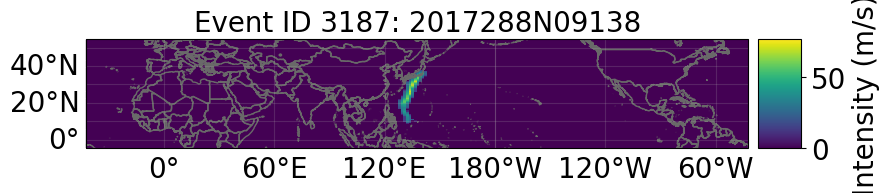

In [76]:
tc_wp.plot_intensity(supchain_impacted.sum(axis=1).idxmax())

In [77]:
supchain_impacted.to_csv("1980_2010_wp_secs_exp_imp_shock.csv")